<a href="https://colab.research.google.com/github/nguyentran9203/nlp_hw1/blob/main/hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
!apt-get update
!apt-get install -y hfst

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading

In [64]:
!pip install hfst

In [65]:
import hfst
from hfst import compile_lexc_file

In [66]:
!wget https://raw.githubusercontent.com/nguyentran9203/nlp_hw1/refs/heads/main/vietnamese_morphology_rules_revised.lexc

--2025-06-14 10:08:24--  https://raw.githubusercontent.com/nguyentran9203/nlp_hw1/refs/heads/main/vietnamese_morphology_rules_revised.lexc
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1157 (1.1K) [text/plain]
Saving to: ‘vietnamese_morphology_rules_revised.lexc’

vietnamese_morpholo 100%[===================>]   1.13K  --.-KB/s    in 0s      

2025-06-14 10:08:24 (50.1 MB/s) - ‘vietnamese_morphology_rules_revised.lexc’ saved [1157/1157]



In [67]:
generator = compile_lexc_file('vietnamese_morphology_rules_revised.lexc')

In [68]:
print(generator)

0	1	đ	đ	0
0	2	t	t	0
0	3	n	n	0
0	4	c	c	0
0	5	b	b	0
0	6	l	l	0
1	7	ỏ	ỏ	0
1	8	ỏ	o	0
2	9	h	h	0
2	10	r	r	0
3	11	g	g	0
4	12	h	h	0
5	13	i	i	0
5	14	ố	ố	0
6	15	ơ	ơ	0
7	16	+Redup	@0@	0
8	17	+ToneCh	'	0
9	18	ơ	ơ	0
9	19	i	i	0
10	20	ắ	ắ	0
10	21	ắ	ă	0
11	22	ơ	ơ	0
12	23	ậ	ậ	0
12	24	ậ	ầ	0
13	25	ế	ế	0
14	26	p	p	0
15	27	+	+	0
16	28	+	+	0
17	29	@0@	'	0
18	30	+	+	0
19	14	ế	ế	0
20	31	n	n	0
21	32	n	n	0
22	33	+	+	0
22	16	+Redup	@0@	0
23	7	m	m	0
24	8	m	m	0
25	26	c	c	0
26	34	+ConsCh	@0@	0
27	35	l	l	0
28	36	đ	đ	0
28	37	t	t	0
28	38	n	n	0
28	39	c	c	0
29	40	+	t	0
29	41	+	đ	0
29	42	+	c	0
30	43	t	t	0
31	7	g	g	0
32	8	g	g	0
33	44	n	n	0
34	45	+	b	0
34	46	+	t	0
35	47	á	á	0
36	48	ỏ	ỏ	0
37	49	r	r	0
38	50	g	g	0
39	51	h	h	0
40	52	t	r	0
41	53	đ	ỏ	0
42	54	c	h	0
43	55	h	h	0
44	56	g	g	0
45	57	b	i	0
45	58	b	ô	0
46	59	t	h	0
47	60	o	o	0
48	0
49	61	ắ	ắ	0
50	48	ơ	ơ	0
51	62	ậ	ậ	0
52	63	r	ắ	0
53	64	ỏ	@0@	0
54	65	h	ậ	0
55	66	ẩ	ẩ	0
56	67	á	á	0
57	68	i	ê	0
58	69	ô	m	0
59	70	h	i	0
60	71	+IrrTone	'	0
61	72	n	n	0
62	48	m	m	0
63	73	ắ	n	0
64	4

In [69]:
# --- FULL REDUPLICATION ---
# These forms simply duplicate the root without changing tones or segments.
print('Full Reduplication:')
print(generator.lookup('đỏ+Redup+đỏ'))  # Expected: luôn luôn
print(generator.lookup("trắng+Redup+trắng"))  # Expected: nhanh nhanh
print(generator.lookup('chậm+Redup+chậm'))  # Expected: lâu lâu

# --- TONE CHANGE REDUPLICATION ---
# The second syllable (reduplicant) changes tone from non-flat to flat.
print('Tone Change Reduplication')
print(generator.lookup('đỏ+ToneCh+đỏ+ToneCh'))  # đỏ → đo: tone flattening
print(generator.lookup('trắng+ToneCh+trắng+ToneCh'))  # trắng → trăng
print(generator.lookup('chậm+ToneCh+chậm+ToneCh'))  # chậm → chầm

# --- FINAL CONSONANT CHANGE REDUPLICATION ---
# Final consonant of the reduplicant differs from the root.
print('Final Consonant Change Reduplication')
print(generator.lookup('biếc+ConsCh+biêng'))  # biếc → biêng
print(generator.lookup('thiếp+ConsCh+thiêm'))  # thiếp → thiêm
print(generator.lookup('bốp+ConsCh+bôm'))  # bốp → bôm

# --- IRREGULAR REDUPLICATION ---
# Handle idiomatic or irregular cases like "ngơ ngác"
print('Irregular Reduplication Pattern')
print(generator.lookup('ngơ+ngác+IrrTone+ngơ+ngác'))  # fixed phrase, idiomatic


Full Reduplication:
(('đỏ@_EPSILON_SYMBOL_@+đỏ', 0.0),)
(('trắng@_EPSILON_SYMBOL_@+trắng', 0.0),)
(('chậm@_EPSILON_SYMBOL_@+chậm', 0.0),)
Tone Change Reduplication
(("đo''đỏ@_EPSILON_SYMBOL_@@_EPSILON_SYMBOL_@", 0.0),)
(("trăng''trắng@_EPSILON_SYMBOL_@@_EPSILON_SYMBOL_@", 0.0),)
(("chầm''chậm@_EPSILON_SYMBOL_@@_EPSILON_SYMBOL_@", 0.0),)
Final Consonant Change Reduplication
(('biếc@_EPSILON_SYMBOL_@biêng+biếc', 0.0),)
(('thiếp@_EPSILON_SYMBOL_@thiêm+thiếp', 0.0),)
(('bốp@_EPSILON_SYMBOL_@bôm+bốp', 0.0),)
Irregular Reduplication Pattern
(("ngơ+ngác''ngơ+ngơ+ngác+ngác", 0.0),)


## Transducers: two-level morphology

In [70]:
from hfst import HfstTransducer

analyzer = HfstTransducer(generator) # Create a copy

print(analyzer.lookup('biếc+ConsCh+biêng'))

(('biếc@_EPSILON_SYMBOL_@biêng+biếc', 0.0),)


In [71]:
analyzer.invert()
analyzer.minimize()

print(analyzer.lookup('biêng biếc'))

()


In [72]:
analyzer.invert()
analyzer.minimize()

print(analyzer.compare(generator))

True


In [73]:
from hfst import regex

## Substitution Rule


In [74]:

revertẮ= regex('"trăng trắng" -> "trắng trắng" ;')
print(revertẮ.lookup("trăng trắng"))


(('trắng trắng', 0.0),)


## Insertion Rule

In [119]:
InsertTrng = regex('"trắng"" ""trắng" -> "trắng+trắng"')
print(InsertTrng.lookup("trắng trắng"))

(('trắng+trắng@_EPSILON_SYMBOL_@@_EPSILON_SYMBOL_@', 0.0),)


## Removal Rule

In [76]:
removeRule = regex('"^" -> 0')
print(removeRule.lookup("trắng^trắng"))

(('trắng@_EPSILON_SYMBOL_@trắng', 0.0),)


## Exceptions

In [77]:
exceptionRule = """
  "ngơ" "" "ngác" -> "ngơ" " " "ngơ" " " "ngác" " " "ngác" ;
"""
exceptions = hfst.regex(exceptionRule)
output = exceptions.lookup("ngơ" "" "ngác")
print(output)

(('ngơ ngơ ngác ngác', 0.0),)


In [104]:
from hfst import compose

print(generator.lookup("trắng+Redup+trắng"))
cascade = compose((generator, revertẮ))
print(cascade.lookup("trắng+Redup+trắng"))
cascade = compose((generator, revertẮ, InsertTrng))
print(cascade.lookup("trắng+Redup+trắng"))
cascade = compose((generator, revertẮ, InsertTrng, removeRule))
print(cascade.lookup("trắng+Redup+trắng"))
cascade = compose((generator, revertẮ, InsertTrng, removeRule, exceptions))
print(cascade.lookup("trắng+Redup+trắng"))

(('trắng@_EPSILON_SYMBOL_@+trắng', 0.0),)
(('trắng@_EPSILON_SYMBOL_@+trắng', 0.0),)
(('trắng@_EPSILON_SYMBOL_@+trắng', 0.0),)
(('trắng@_EPSILON_SYMBOL_@+trắng', 0.0),)
(('trắng@_EPSILON_SYMBOL_@+trắng', 0.0),)


In [105]:
# Analysis
inv = hfst.HfstTransducer(cascade)
inv.invert()
inv.convert(hfst.ImplementationType.HFST_OL_TYPE)
print(inv.lookup("trắng@_EPSILON_SYMBOL_@+trắng"))

(('trắng+Redup+trắng', 0.0),)


In [81]:
cascade.remove_epsilons()
print(cascade.lookup("trắng+Redup+trắng")[0][0].replace("@_EPSILON_SYMBOL_@+", " "))

trắng trắng


## FST visualization

In [120]:
import sys

def hfst2png(transducer, png_name):
    # Write the FST to a file using the att format
    f = open("a.att", "w", encoding="utf-8")
    transducer.minimize()
    transducer.write_att(f, False)


    f = open("a.att", "r", encoding="utf-8")
    with open("graph.dot", "w", encoding="utf-8") as out_f:
        out_f.write('digraph G { rankdir="LR"\n')
        out_f.write('node [fontname="Tahoma",shape=circle,fontsize=14,fixedsize=true,fillcolor="grey",style=filled]\n')
        out_f.write('edge [fontname="FreeMono",fontsize=14]\n')
        for line in f.readlines():
            line = line.strip()
            row = line.split('\t')
            if len(row) >= 4:
                out_f.write('%s [label="%s"];\n' % (row[0], row[0]))
                out_f.write('%s -> %s [label="%s:%s"];\n' % (row[0], row[1], row[2], row[3]))
            elif len(row) == 1: # Final state
                out_f.write('%s [label="%s",shape=doublecircle];\n' % (row[0], row[0]))
        out_f.write('}')


    !dot -Tpng graph.dot > $png_name

In [121]:
hfst2png(cascade,'image.png')

In [123]:
from IPython.display import Image

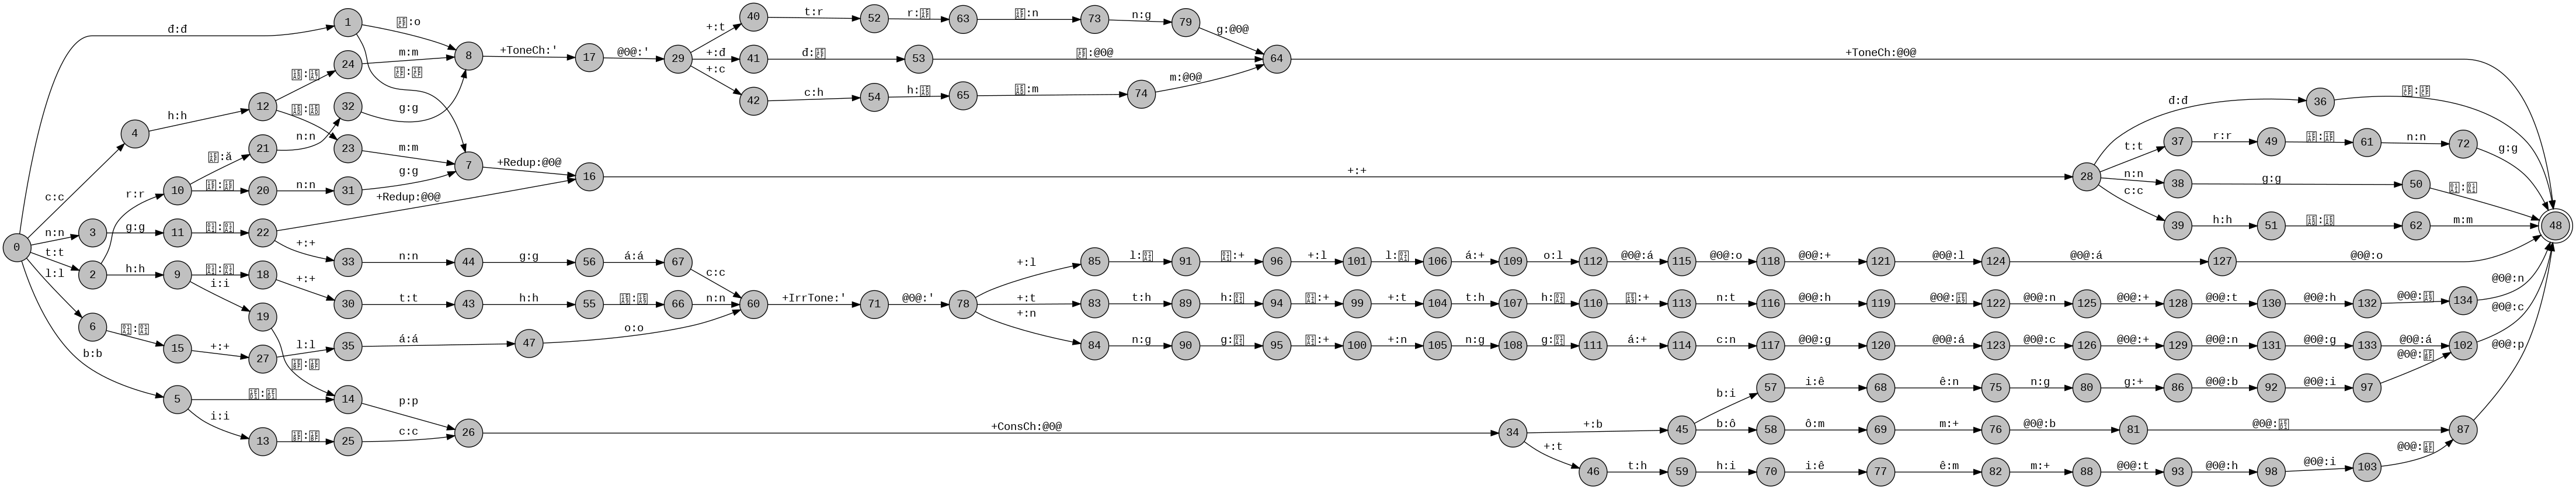

In [124]:
Image('image.png')